In [2]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np


### Data - CIFAR10
have 10 classes - labelled 0 to 9

In [5]:
# download the data which is already there in torchvision repo
transform = transforms.Compose([transforms.ToTensor()])
dataPath = f'/home/wd/Documents/work_stuff/ViT_REPLICATION/data/CIFAR10'
dataset = torchvision.datasets.CIFAR10(root=dataPath, train=False, download=True,  
                                        transform=transform)


In [6]:
img, label = dataset[0]

In [7]:
img

tensor([[[0.6196, 0.6235, 0.6471,  ..., 0.5373, 0.4941, 0.4549],
         [0.5961, 0.5922, 0.6235,  ..., 0.5333, 0.4902, 0.4667],
         [0.5922, 0.5922, 0.6196,  ..., 0.5451, 0.5098, 0.4706],
         ...,
         [0.2667, 0.1647, 0.1216,  ..., 0.1490, 0.0510, 0.1569],
         [0.2392, 0.1922, 0.1373,  ..., 0.1020, 0.1137, 0.0784],
         [0.2118, 0.2196, 0.1765,  ..., 0.0941, 0.1333, 0.0824]],

        [[0.4392, 0.4353, 0.4549,  ..., 0.3725, 0.3569, 0.3333],
         [0.4392, 0.4314, 0.4471,  ..., 0.3725, 0.3569, 0.3451],
         [0.4314, 0.4275, 0.4353,  ..., 0.3843, 0.3725, 0.3490],
         ...,
         [0.4863, 0.3922, 0.3451,  ..., 0.3804, 0.2510, 0.3333],
         [0.4549, 0.4000, 0.3333,  ..., 0.3216, 0.3216, 0.2510],
         [0.4196, 0.4118, 0.3490,  ..., 0.3020, 0.3294, 0.2627]],

        [[0.1922, 0.1843, 0.2000,  ..., 0.1412, 0.1412, 0.1294],
         [0.2000, 0.1569, 0.1765,  ..., 0.1216, 0.1255, 0.1333],
         [0.1843, 0.1294, 0.1412,  ..., 0.1333, 0.1333, 0.

In [8]:
img.shape

torch.Size([3, 32, 32])

In [9]:
img.numpy()

array([[[0.61960787, 0.62352943, 0.64705884, ..., 0.5372549 ,
         0.49411765, 0.45490196],
        [0.59607846, 0.5921569 , 0.62352943, ..., 0.53333336,
         0.49019608, 0.46666667],
        [0.5921569 , 0.5921569 , 0.61960787, ..., 0.54509807,
         0.50980395, 0.47058824],
        ...,
        [0.26666668, 0.16470589, 0.12156863, ..., 0.14901961,
         0.05098039, 0.15686275],
        [0.23921569, 0.19215687, 0.13725491, ..., 0.10196079,
         0.11372549, 0.07843138],
        [0.21176471, 0.21960784, 0.1764706 , ..., 0.09411765,
         0.13333334, 0.08235294]],

       [[0.4392157 , 0.43529412, 0.45490196, ..., 0.37254903,
         0.35686275, 0.33333334],
        [0.4392157 , 0.43137255, 0.44705883, ..., 0.37254903,
         0.35686275, 0.34509805],
        [0.43137255, 0.42745098, 0.43529412, ..., 0.38431373,
         0.37254903, 0.34901962],
        ...,
        [0.4862745 , 0.39215687, 0.34509805, ..., 0.38039216,
         0.2509804 , 0.33333334],
        [0.4

In [35]:
np.transpose(img.numpy(), (1, 2, 0)).shape

(32, 32, 3)

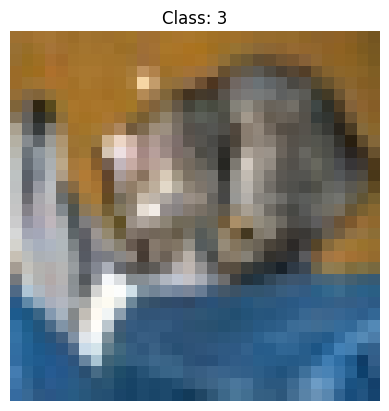

In [28]:
plt.imshow(np.transpose(img.numpy(), (1, 2, 0))) # you need to pass the index : channel, height, width -> height, width, channel
plt.title(f"Class: {label}")
plt.axis('off')
plt.show()

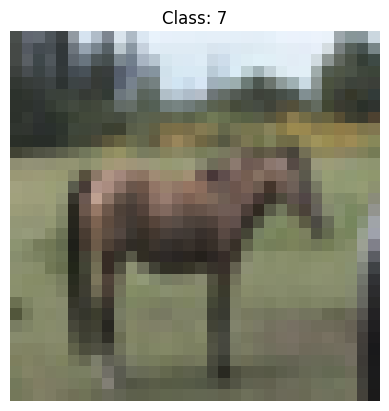

In [33]:
img, label = dataset[9999]
plt.imshow(np.transpose(img.numpy(), (1, 2, 0))) # you need to pass the index : channel, height, width -> height, width, channel
plt.title(f"Class: {label}")
plt.axis('off')
plt.show()

### Patch Embedding
📦 What is the Goal?
We want to:

Break an image into non-overlapping patches (e.g., 4×4).

Flatten each patch.

Project each patch into a vector space (i.e., embedding).

Output shape should be (Batch, Num_Patches, Embedding_Dim) — just like how Transformers expect.

In [ ]:
class PatchEmbedding(nn.Module):
    def __init__(self, in_channels=3, patch_size=4, emb_size=128, img_size=32):
        super().__init__()
        self.patch_size = patch_size
        self.n_patches = (img_size // patch_size) ** 2
        self.projection = nn.Conv2d(in_channels, emb_size, kernel_size=patch_size, stride=patch_size)

    def forward(self, x):
        x = self.projection(x)       # (B, emb_size, H/patch, W/patch)
        print(f'after applying conv2D, {x.shape}')
        x = x.flatten(2)             # (B, emb_size, N)
        print(f'after flattening, {x.shape}')
        x = x.transpose(1, 2)        # (B, N, emb_size)
        print(f'after transpose {x.shape}')
        return x


In [15]:
img_tensor = img.unsqueeze(0)
img_tensor

tensor([[[[0.6196, 0.6235, 0.6471,  ..., 0.5373, 0.4941, 0.4549],
          [0.5961, 0.5922, 0.6235,  ..., 0.5333, 0.4902, 0.4667],
          [0.5922, 0.5922, 0.6196,  ..., 0.5451, 0.5098, 0.4706],
          ...,
          [0.2667, 0.1647, 0.1216,  ..., 0.1490, 0.0510, 0.1569],
          [0.2392, 0.1922, 0.1373,  ..., 0.1020, 0.1137, 0.0784],
          [0.2118, 0.2196, 0.1765,  ..., 0.0941, 0.1333, 0.0824]],

         [[0.4392, 0.4353, 0.4549,  ..., 0.3725, 0.3569, 0.3333],
          [0.4392, 0.4314, 0.4471,  ..., 0.3725, 0.3569, 0.3451],
          [0.4314, 0.4275, 0.4353,  ..., 0.3843, 0.3725, 0.3490],
          ...,
          [0.4863, 0.3922, 0.3451,  ..., 0.3804, 0.2510, 0.3333],
          [0.4549, 0.4000, 0.3333,  ..., 0.3216, 0.3216, 0.2510],
          [0.4196, 0.4118, 0.3490,  ..., 0.3020, 0.3294, 0.2627]],

         [[0.1922, 0.1843, 0.2000,  ..., 0.1412, 0.1412, 0.1294],
          [0.2000, 0.1569, 0.1765,  ..., 0.1216, 0.1255, 0.1333],
          [0.1843, 0.1294, 0.1412,  ..., 0

In [16]:
img_tensor.shape

torch.Size([1, 3, 32, 32])

In [11]:
patch_size = 4
n_patches = (32 // patch_size) ** 2
projection = nn.Conv2d(3, 128, kernel_size=patch_size, stride=patch_size)


In [18]:
img_tensor

tensor([[[[0.6196, 0.6235, 0.6471,  ..., 0.5373, 0.4941, 0.4549],
          [0.5961, 0.5922, 0.6235,  ..., 0.5333, 0.4902, 0.4667],
          [0.5922, 0.5922, 0.6196,  ..., 0.5451, 0.5098, 0.4706],
          ...,
          [0.2667, 0.1647, 0.1216,  ..., 0.1490, 0.0510, 0.1569],
          [0.2392, 0.1922, 0.1373,  ..., 0.1020, 0.1137, 0.0784],
          [0.2118, 0.2196, 0.1765,  ..., 0.0941, 0.1333, 0.0824]],

         [[0.4392, 0.4353, 0.4549,  ..., 0.3725, 0.3569, 0.3333],
          [0.4392, 0.4314, 0.4471,  ..., 0.3725, 0.3569, 0.3451],
          [0.4314, 0.4275, 0.4353,  ..., 0.3843, 0.3725, 0.3490],
          ...,
          [0.4863, 0.3922, 0.3451,  ..., 0.3804, 0.2510, 0.3333],
          [0.4549, 0.4000, 0.3333,  ..., 0.3216, 0.3216, 0.2510],
          [0.4196, 0.4118, 0.3490,  ..., 0.3020, 0.3294, 0.2627]],

         [[0.1922, 0.1843, 0.2000,  ..., 0.1412, 0.1412, 0.1294],
          [0.2000, 0.1569, 0.1765,  ..., 0.1216, 0.1255, 0.1333],
          [0.1843, 0.1294, 0.1412,  ..., 0

In [19]:
x = projection(img_tensor)
x

tensor([[[[-0.4079, -0.4130, -0.4335,  ..., -0.3215, -0.3545, -0.3365],
          [-0.3319, -0.4081, -0.3339,  ..., -0.4208, -0.3020, -0.3427],
          [-0.4953, -0.4725, -0.4733,  ..., -0.4309, -0.3271, -0.3260],
          ...,
          [-0.4676, -0.6187, -0.5448,  ..., -0.2677, -0.3325, -0.3198],
          [-0.3762, -0.5618, -0.3774,  ..., -0.3353, -0.3672, -0.3828],
          [-0.3917, -0.3417, -0.2964,  ..., -0.3491, -0.3843, -0.3305]],

         [[-0.1116, -0.1061, -0.0760,  ..., -0.1057, -0.0838, -0.0574],
          [-0.1112, -0.1058, -0.2487,  ..., -0.0888, -0.0212, -0.0902],
          [-0.0353, -0.1077, -0.1289,  ..., -0.1242, -0.0193, -0.0911],
          ...,
          [-0.2730,  0.0043, -0.0913,  ...,  0.0141, -0.0862, -0.0854],
          [-0.1012, -0.3346,  0.0162,  ..., -0.0799, -0.1057, -0.1420],
          [-0.0342, -0.1908, -0.0650,  ..., -0.0622, -0.1575, -0.0335]],

         [[ 0.0770,  0.0862,  0.0968,  ...,  0.1094,  0.1006,  0.0647],
          [ 0.1222,  0.0807,  

In [20]:
x.shape

torch.Size([1, 128, 8, 8])

In [22]:
x.flatten(2).shape

torch.Size([1, 128, 64])

In [24]:
x.flatten(2).transpose(1,2).shape

torch.Size([1, 64, 128])

In [ ]:
img_tensor = img.unsqueeze(0)  # Add batch dimension: for one image, the shape will be (1, 3, 32, 32), we are faking the batch size just because the model demands a 4D tensor as the input

patch_embed = PatchEmbedding(patch_size=4, emb_size=64)
with torch.no_grad():
    patch_vectors = patch_embed(img_tensor)

print("Output shape:", patch_vectors.shape)